# Принятие решений в бизнесе

**Заказчик**\
Интернет-магазин 

**Цель проекта**\
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
Список этих гипотез ранее был подготовлен совместно с отделом маргетинга для увеличения выручки компании.

**Входные данные**\
Данные для приоритизация гипотез:\
Файл со списком гипотез /datasets/hypothesis.csv\
•	Hypothesis — краткое описание гипотезы;\
•	Reach — охват пользователей по 10-балльной шкале;\
•	Impact — влияние на пользователей по 10-балльной шкале;\
•	Confidence — уверенность в гипотезе по 10-балльной шкале;\
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для анализа A/B-теста:\
Файл с информацией о заказах пользователей в интернет-магазине /datasets/orders.csv\
•	transactionId — идентификатор заказа;\
•	visitorId — идентификатор пользователя, совершившего заказ;\
•	date — дата, когда был совершён заказ;\
•	revenue — выручка заказа;\
•	group — группа A/B-теста, в которую попал заказ.\
Файл с информацией о посещениях пользователями интернет-магазина /datasets/visitors.csv\
•	date — дата;\
•	group — группа A/B-теста;\
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


**Ход анализа**\
Анализ пройдёт в несколько этапов:\
• Обзор и предобработка данных;\
• Приоритезация гипотез;\
• Анализ А/В-теста.

In [1]:
# импортируем библиотеки
import pandas as pd
from IPython.display import display
from datetime import datetime, timedelta
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

## 1.  Загрузим данные и подготовим их к анализу

In [2]:
# загрузим данные о гипотезах, заказах и посещениях из CSV-файлов в переменные
hypothesis = pd.read_csv('C:/Users/nata/Downloads/hypothesis.csv')
orders = pd.read_csv('C:/Users/nata/Downloads/orders.csv')
visitors = pd.read_csv('C:/Users/nata/Downloads/visitors.csv')

In [3]:
# выведем три таблицы с помощью функции display
display(hypothesis, orders, visitors)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [4]:
# выведем основную информацию о датафреймах с помощью метода info()
hypothesis.info()
print()
orders.info()
print()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 # 

In [5]:
# выведем количество строк-дубликатов в данных и их процент в д
print('Количество строк-дубликатов в данных hypothesis =', hypothesis.duplicated().sum())
print('Количество строк-дубликатов в данных orders =', orders.duplicated().sum())
print('Количество строк-дубликатов в данных visitors =', visitors.duplicated().sum())

Количество строк-дубликатов в данных hypothesis = 0
Количество строк-дубликатов в данных orders = 0
Количество строк-дубликатов в данных visitors = 0


**Промежуточные выводы:** \
Мы выгрузили данные и изучили основную информацию о гипотезах, заказах и посещениях.\
Перед тем как приступить к анализу необходимо подготовить данные, а именно:\
. отредактировать некоторые названия колонок;\
. преобразовать типы данных у части колонок в таблицах.

In [6]:
# приведем к нижнему регистру название колонок
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [7]:
# частично переименуем название колонок
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [8]:
# изменим тип данных для столбцов с датами
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

**Промежуточные итоги:** \
После изучения общей информации о данных выяснили:\
. данные представлены тремя таблицами;\
. все данные заполнены (т.е. в столбцах отсутуют пропущенные значения);\
. у части данных некорретный тип данных и мы это исправили;\
. в названиях колонок — расхождения с хорошим стилем и это тоже мы исправили;\
. строк-дубликатов не обнаружено.

In [9]:
# проверка, не попадают ли какие-то пользователи в обе группы - по таблице с заказами.
len(orders.loc[orders["group"]=="1", "visitor_id"].isin(orders.loc[orders["group"]=="2", "visitor_id"]))

0

## 2.  Приоритизация гипотез

В файле '/datasets/hypothesis.csv' девять гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

Мы:

### 2.1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [10]:
# посчитаем ICE для гипотез и добавим полученные значения ICE к существующей таблице, отсортировав по столбцу 'ICE'
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

In [11]:
pd.set_option('max_colwidth', 200)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Промежуточные выводы:** \
Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6, 2.

### 2.2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [12]:
# посчитаем RICE для гипотез и добавьте полученные значения RICE к существующей таблице, отсортировав по столбцу 'RICE'
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Промежуточные выводы:** \
И снова наиболее перспективные гипотезы те же: 7, 2, 0, 6, 8.

### 2.3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Приоритизация гипотез при применении RICE вместо ICE изменила последовательность в топ-5 перпективных гипотез. При применении RICE на первом месте уже гипотеза под номером 7, а не 8. Так получилось, потому что её параметр Reach равен 10, в то время как у других гипотез он меньше (напомним Reach - это скольких пользователей затронет изменение, которое вы хотите внести).

## 3. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Проанализируем A/B-тест.

### 3.1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения

In [13]:
# cоздаем датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders,
# избавляясь от дубликатов методом drop_duplicates()
datesGroups = orders[['date','group']].drop_duplicates() 

# объявиляем переменную ordersAggregated, содержащую:
# . дату;
# . группу A/B-теста;
# . число уникальных заказов в группе теста по указанную дату включительно;
# . число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
# . суммарную выручку заказов в группе теста по указанную дату включительно
# отсортируем по столбцам 'date', 'group' в указанном порядке
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объявляем переменную visitorsAggregated, содержащую:
# . дату;
# . группу A/B-теста;
# . количество уникальных посетителей в группе теста по указанную дату включительно
# отсортируем по столбцам 'date', 'group' в указанном порядке
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))


# определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' 
# методом merge()
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# присвоим столбцам cumulativeData текущие названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# выведим первые 5 строк переменной cumulativeData
print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [14]:
print('Минимальная и максимальная даты в текущем датафрейме', cumulativeData['date'].min(), 'и', cumulativeData['date'].max())

Минимальная и максимальная даты в текущем датафрейме 2019-08-01 00:00:00 и 2019-08-31 00:00:00


In [15]:
print('Минимальная и максимальная даты в исходных данных', orders['date'].min(), 'и', orders['date'].max())

Минимальная и максимальная даты в исходных данных 2019-08-01 00:00:00 и 2019-08-31 00:00:00


In [16]:
# объявим переменные cumulativeRevenueA и cumulativeRevenueB, 
# в которых сохраним данные о датах, выручке и числе заказов в группах A и B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

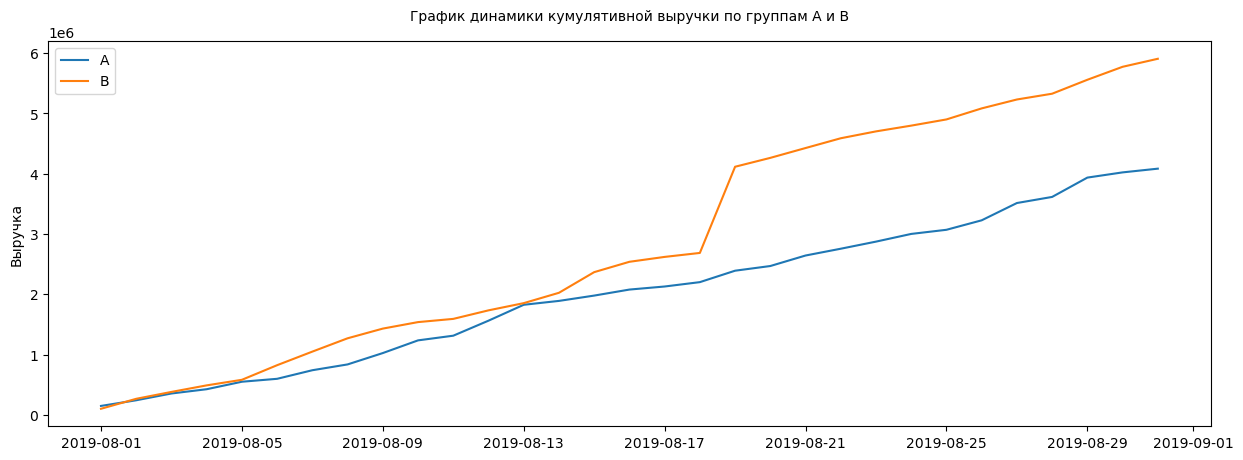

In [17]:
# cтроим график выручки для групп
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам А и В', fontsize=10, pad=15)
plt.ylabel("Выручка")
plt.xticks()
plt.legend() 
plt.show()

**Промежуточные выводы:** \
К концу теста (с 18 августа) сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что в группе В есть аномально большие заказы, которые влияют на результаты. При дальнейшем анализе их нужно будет скорее всего удалить.

### 3.2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

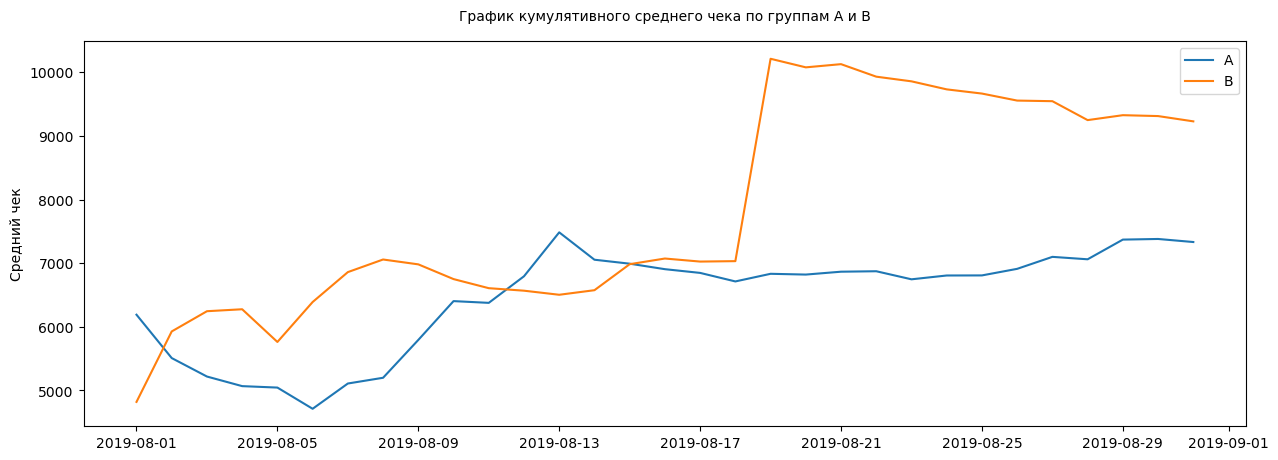

In [18]:
# для каждой группы построим графики кумулятивного среднего чека по дням
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам А и В', fontsize=10, pad=15)
plt.ylabel("Средний чек")
plt.xticks()
plt.legend() 
plt.show()

**Промежуточные выводы:** \
Кумулятивное значение среднего чека группе А через какое-то время стабилизировался (с 15 августа). А вот кумулятивное значение среднего чека в группе В показал резкий скачок 18 августа, что говорит в пользу об аномально больших заказах.

### 3.3. 	Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

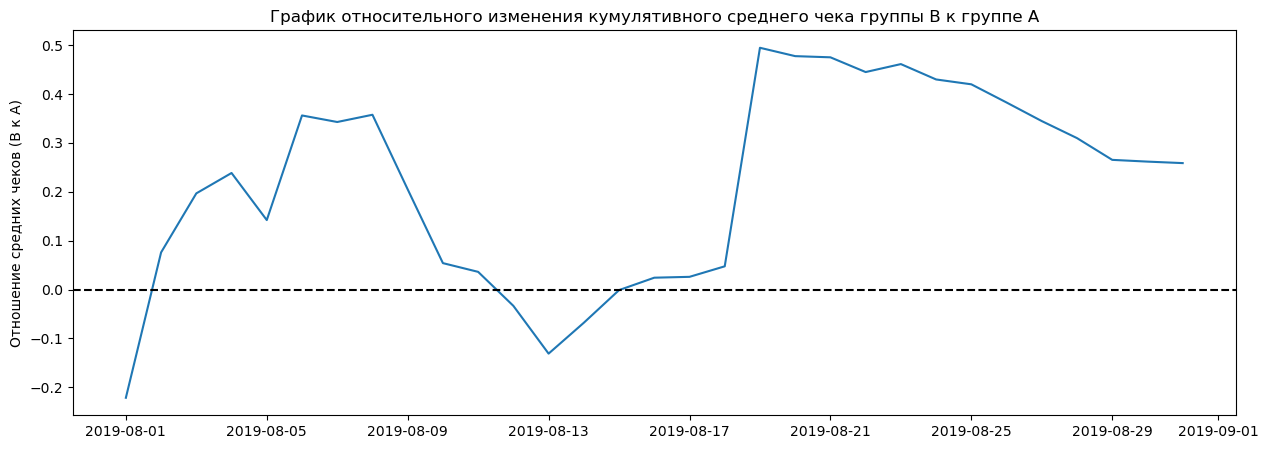

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel("Отношение средних чеков (В к А)")
plt.xticks()
plt.show()

**Промежуточные выводы:** \
Результаты теста значительно и резко менялись в несколько дат (т.е. в начале теста группа B проигрывала группе A, затем вырвалась вперёд, а потом вновь проигрывалаи и снова вырвалась вперед). Видимо, именно тогда были совершены аномальные заказы.   

### 3.4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения

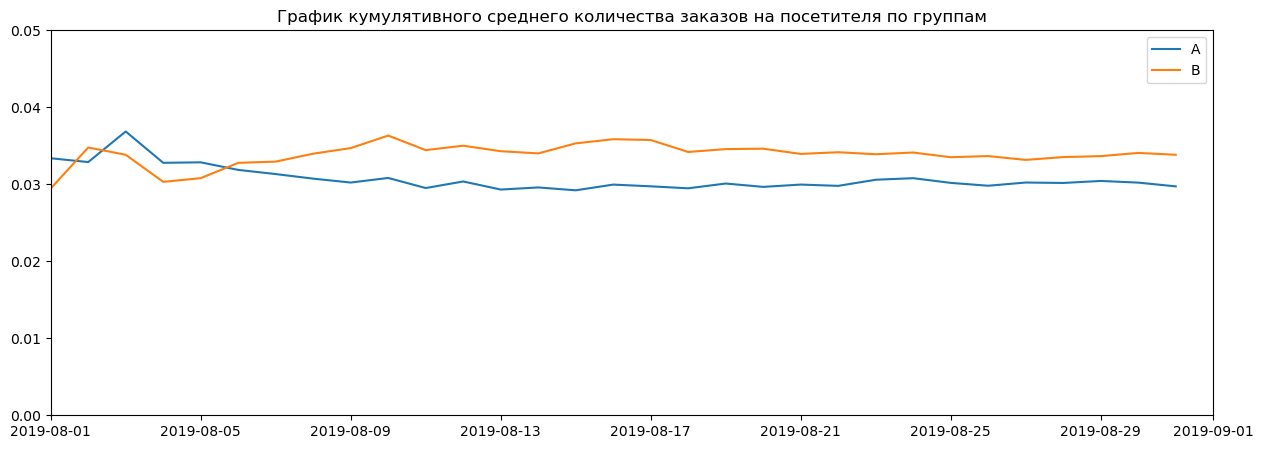

In [20]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks()
plt.show()

**Промежуточные выводы:** \
В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.
Мы изменили масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 3% до 4%. 

### 3.5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения

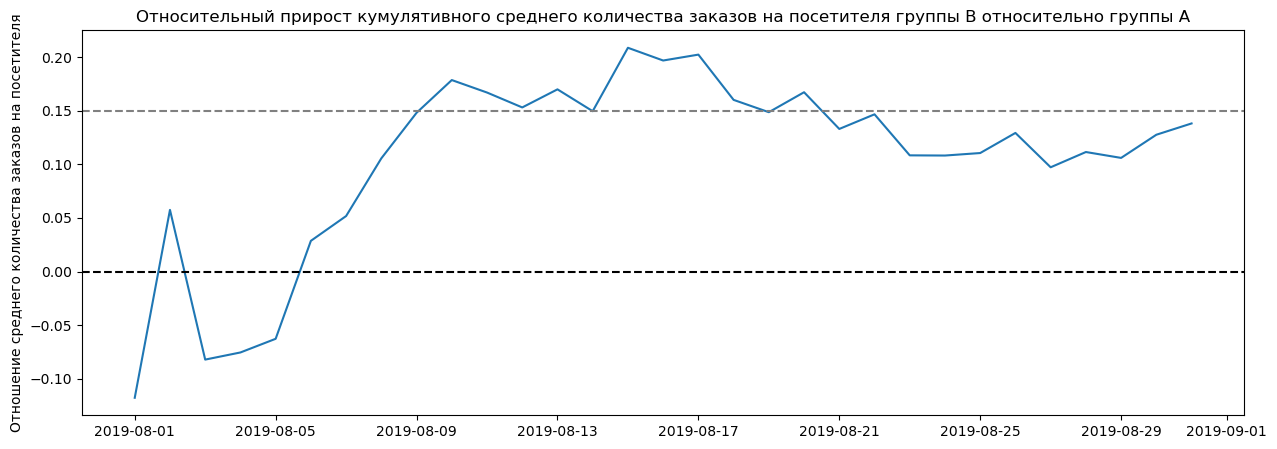

In [21]:
# объединим таблицы cumulativeDataA и cumulativeDataB методом merge()
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построим график
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

# добавьте пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline() 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.ylabel("Отношение среднего количества заказов на посетителя")
plt.xticks()
plt.show()

**Промежуточные выводы:** \
Мы построили график относительного различия метрики между группами.
С самого начала теста группа B лидирует по метрике: становится лучше и лучше, либо зафиксировалась около прироста в 10% относительно группы A.

### 3.6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

In [22]:
# создадим датафрейм c двумя столбцами: 'visitor_id' и 'orders' 
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

# отсортируем по убыванию количества заказов пользователей и выведим на экран первые 10 строк
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


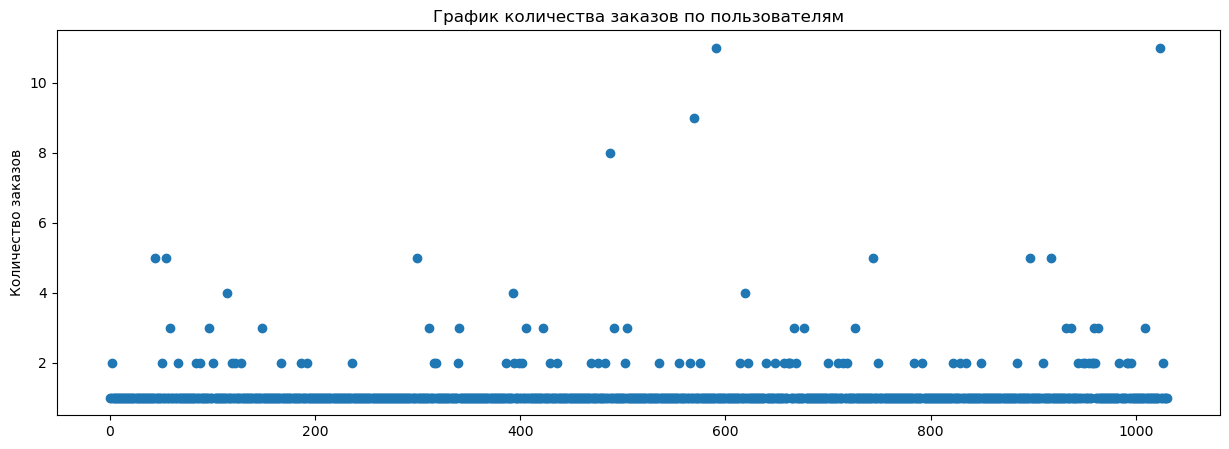

In [23]:
# построим диаграмму методом scatter()
plt.figure(figsize=(15,5))
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.ylabel("Количество заказов")
plt.show()

**Промежуточные выводы:** \
Большинство пользователей совершило всего 1 заказ. Пользователей, заказавших более двух раз, гораздо меньше. Они вполне могут быть аномальными.

### 3.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей

In [24]:
# посчитаем 95-й и 99-й перцентили количества заказов по пользователям методом np.percentile()
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


**Промежуточные выводы:** \
Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырех заказов.\
Граница аномальных пользователей - 4 заказа на одого пользователя.

### 3.8. Построем точечный график стоимостей заказов. Сделаем выводы и предположения

In [25]:
# отсортируем заказы пользователей по убыванию выручки и выведим на экран первые 10 строк
print(orders.sort_values(by='revenue', ascending=False).head(10))

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


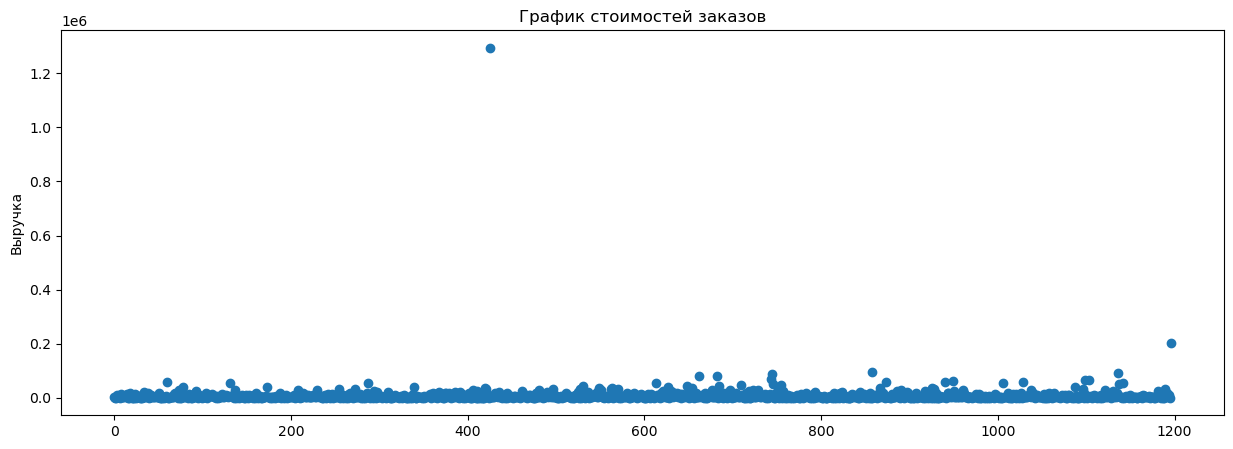

In [26]:
# построим диаграмму методом scatter()
plt.figure(figsize=(15,5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel("Выручка")
plt.show()

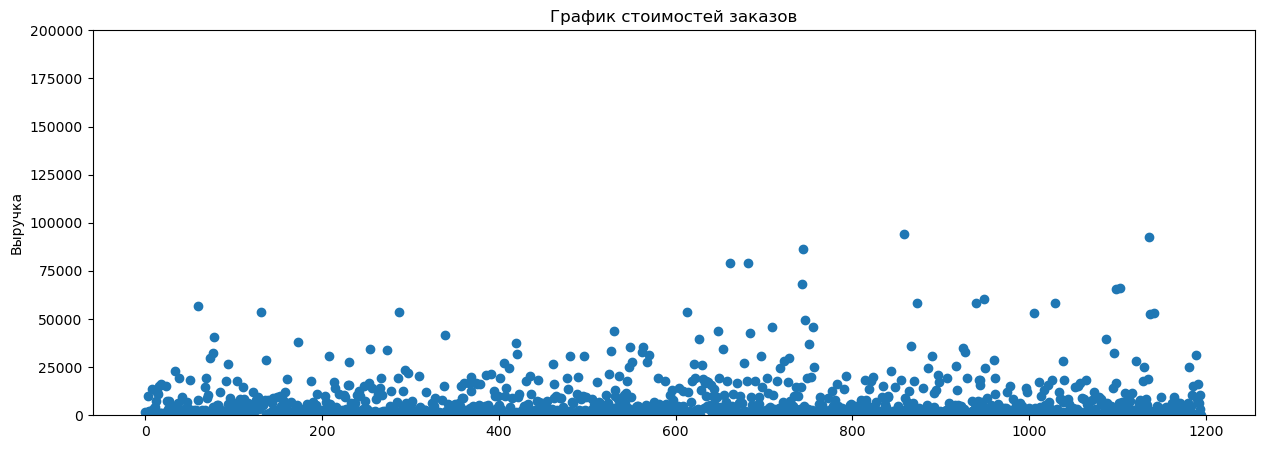

In [27]:
# добавим еще один график, ограничив значения по оси Y
# чтобы двух явных выбросов не было видно, а мы могли рассмотреть основную часть заказов
plt.figure(figsize=(15,5))
plt.ylim(0, 200000)
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel("Выручка")
plt.show()

**Промежуточные выводы:** \
Заказов стоимостью 200 000 у.е. не очень много. Есть выброс в районе 1 250 000 у.е. Заказ на 1,25 миллиона в интернет-магазине выглядит весьма аномально.

### 3.9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [28]:
# посчитаем 95-й и 99-й перцентили стоимости заказов методом np.percentile()
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Промежуточные выводы:**\
Не более, чем у 5% заказов чек дороже 28 000 у.е. И не больше, чем у 1% заказов — дороже 58 233 у.е. 
Граница аномальных заказов - чек на 28 000 у.е.

### 3.10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя без удаления аномальных пользователей.

    
Сформулируем гипотезы.\
Нулевая: статистически значимых различий в среднем количестве заказов между группами по «сырым» данным нет.\
Альтернативная: статистически значимые различия в среднем количестве заказов между группами по «сырым» данным есть. 

    
Для уровеня значимости установим стандартный уровень статистической значимости, равный 0.05.

    
Так как в данных о продажах и средних чеках есть большие (по сравнению с нормальным распределением) выбросы, то для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [29]:
# начнём с подготовки данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Для дельнейшего исследования будем работать с этой таблицей, которая содержит информацию:\
• date — дата;\
• ordersPerDateA — количество заказов в выбранную дату в группе A;\
• revenuePerDateA — суммарная выручка в выбранную дату в группе A;\
• ordersPerDateB — количество заказов в выбранную дату в группе B;\
• revenuePerDateB — суммарная выручка в выбранную дату в группе B;\
• ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;\
• revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;\
• ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;\
• revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;\
• visitorsPerDateA — количество пользователей в выбранную дату в группе A;\
• visitorsPerDateB — количество пользователей в выбранную дату в группе B;\
• visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;\
• visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [30]:
# cоздадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'],
# в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
# Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
 
    
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [31]:
# применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Oтносительный выигрыш группы B =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Oтносительный выигрыш группы B = 0.138


**Промежуточные выводы:** \
По «сырым» данным есть различия в среднем числе заказов групп A и B. \
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. И относительный выгрыш группы B равен 13,8% — второе число в выводе.

### 3.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения

Проверим статистическую значимость различий в среднем чеке между сегментами.\
Нулевая гипотеза: различий в среднем чеке между группами нет.\
Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [32]:
# применим критерий и передадим данные о выручке с заказов
# найдём относительные различия в среднем чеке между группами
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Cредний чек группы B выше А на =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Cредний чек группы B выше А на = 0.259


**Промежуточные выводы:** \
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия по "сырым" данным, нет. И средний чек группы B на 25,9% выше среднего чека группы A.

### 3.12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 28 000 у.е.\
Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.\
Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
print('Количество аномальных пользователей =', abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitor_id, dtype: int64

Количество аномальных пользователей = 59


Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.
    
    
Сформулируем гипотезы.\
Нулевая: статистически значимых различий в среднем количестве заказов между группами по очищенным данным нет.\
Альтернативная: статистически значимые различия в среднем количестве заказов между группами по очищенным данным есть. 
    

    
Для уровеня значимости установим стандартный уровень статистической значимости, равный 0.05.

    
    
Так как в данных о продажах и средних чеках есть (по сравнению с нормальным распределением) выбросы, то для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [34]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [35]:
# применим статистический критерий Манна-Уитни к полученным выборкам
print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Oтносительный выгрыш группы B равен =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value = 0.018
Oтносительный выгрыш группы B равен = 0.145


**Промежуточные выводы:** \
     Результаты по среднему количеству заказов практически не изменились, т.е. и по очищенным данным есть различия в среднем числе заказов групп A и B.\
Первое число — p-value = 0.018 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. И относительный выгрыш группы B равен 14,8% — второе число в выводе.  

### 3.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформулируем гипотезы.
Нулевая: статистически значимых различий в среднем чеке заказа между группами по очищенным данным нет.
Альтернативная: статистически значимые различия в в среднем чеке заказа между группами по очищенным данным есть.

Для уровеня значимости установим стандартный уровень статистической значимости, равный 0.05.

Так как в данных о продажах и средних чеках есть (по сравнению с нормальным распределением) выбросы, то для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [36]:
print('p-value = ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Cредний чек группы B меньше А на ='
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value =  0.961
Cредний чек группы B меньше А на =-0.014


**Промежуточные выводы:** \
P-value увеличился (с 72,9% до 97,7%), но и разница между сегментами иная - средний чек группы В стал меньше А на 1,7% (ранее чек был больше на 25,9%).

### 3.14. Примим решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Имеющиеся факты:\
• Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий (относительный выгрыш группы B равен 13,8-14,8%);\
• Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий (при этом средний чек группы В меньше на "очищенных" данных на 1,7%);\
• График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и  есть тенденции к улучшению ( прирост составил в районе 10% относительно группы A).

Исходя из обнаруженных фактов, тест следует остановить и признать победу группы В.